# **Recurrent Neural Networks in Neuroscience**

This notebook explores Recurrent Neural Networks. In the end, you will have a basic understanding of what RNNs are, how they work, how to use them, and what limitations they have. We will also look at a small example that features sex prediction based on fMRI data. Sounds interesting? Damn right it does!


> Before starting the course, you should have a basic understanding of Python, how neural networks are structured, how optimizing them works, and what activation functions are. But for now, a basic understanding will do.


**Feeling prepared? Perfect! Let's get into it:**



##**What are RNNs?**

Recurrent Neural Networks (RNNs) are a class of neural networks that utilize data sequences. The sequence of data can be critical, with the language being a prominent example of that: The sentences


> *I'm eating right now, dad.*


and

> *I'm eating dad right now.*

mean totally different things while only the order of their words differs. Sequence matters! There are countless more examples in which the consecutiveness of data is relevant: From weather-forecasting (if it rained a few seconds ago, chances are, it is still raining) to animations to EEG-time-series. However, "ordinary" neural networks have no capabilities of treating data as something sequential.

**In contrast, RNNs are designed to process data in order, thus, keeping the consecutiveness in "mind".**

##**How they work.**
RNNs pass some information of previous timesteps to the hidden states of subsequent steps. They can be trained to ideally only pass down relevant information, disregarding everything that doesn't help minimize a given loss.

Let's look at the "rolled" version of the visualization of RNNs (left) and compare that to "ordinary" NNs (right). Blue circles symbolize some inputs, while the green circles are hidden states. In RNNs, the output is fed forward to the next step of the network, visualized by the green arrow feeding back into the hidden state: Some information is preserved for the next generation of output.
![](https://drive.google.com/uc?export=view&id=1n4-mLjGajDdwutAEP4jtNmbYk9cGNBwM)

Let's unroll the Neural Network, as it helps visualize RNNs that way. $X_t$ are the inputs for every timestep, while $Y_t$ are the respective outputs generated. While regular Neural Networks would generate output only based on the input, RNNs pass information down for the next timestep while also accepting further input. Since $X_t$ is fed to the network "one step at a time," the consecutiveness is preserved. 
![](https://drive.google.com/uc?export=view&id=13URFZ3McnGPXfM7iyAEu6l3EhGfGMKOh)

##**Types of RNNs**

There are essentially four different types of RNNs, depending on their amount of input and outputs:


1.   One-To-One
2.   One-To-Many
3.   Many-To-One
4.   Many-To-Many



![](https://drive.google.com/uc?export=view&id=1mcONsIzaOAFkbRkJmqtT3Ro8u9NxnqsJ)

### **One-to-One**
This would be your basic Neural Network: One input, some hidden state, and one output. Basic and traditional.

### **One-to-Many**
A little more interesting: One input and multiple outputs. Every hidden state also passes some information over to the next hidden unit. One cool example is image-captioning: One input (an image) is supposed to generate multiple outputs (Sentences describing the image in somewhat correct English). If you want to know more, [this](https://wandb.ai/authors/image-captioning/reports/Generate-Meaningful-Captions-for-Images-with-Attention-Models--VmlldzoxNzg0ODA) article is quite interesting.

### **Many-to-One**
At this point, you probably got the gist: many inputs (like a bunch of words in a sentence), and the RNN generates one output (like the sentiment of the sentence).

### **Many-To-Many**
As you might have already seen in the picture, there are two different types of Many-to-Many structures. Firstly, the output is generated for every input (a typical example is entity recognition in texts; thus, an RNN identifying what names are in a sentence). Output length can also be different from the input length, only generated after the RNN has "seen" all the input. The most prevalent example of this would be language translation. Languages might have different grammar and word positioning. Thus, it would make little sense to start generating the translation from the first word fed into the Neural Network.

# **Yeah, we kinda skipped math.**
You might have seen this coming, but there is a bunch of complicated math behind everything. Of course, it isn't terribly important to get everything, but gaining a basic understanding of how the modules behind the RNNs work might help you in the long run! There are literally thousands of RNN-units-types, but we will only focus on the two most common RNN-units: GRUs and LSTMs, one of which we will also use in the following coding example.
## **RNNs**
![](http://dprogrammer.org/wp-content/uploads/2019/04/RNN_Core2-768x491.png)

But first, just some recap of how RNN-hidden units generally work: an input-vector $x_t$ is passed along with a hidden-layer-vector from the previous time-step to, in this case, a tanh-function, generating some output $o_t$ and another hidden-layer-vector, that gets passed along to the following layer. Both feed-forward mechanisms and back-propagation are used to update weights and biases. If you are interested in the higher-level math, let me link you [here]((https://http://dprogrammer.org/rnn-lstm-gru), from where RNN illustrations were also taken.
## **LSTM - Long-Short Term Memory**
![](http://dprogrammer.org/wp-content/uploads/2019/04/LSTM-Core-768x466.png)

Classic RNNs have issues with long-term dependencies. They perform well regarding short-term dependencies like predicting the next word in 

> "**Blue** is my favorite _____". (wanted output: **color**)


When the distance between the context (**Blue**) and prediction grows larger, RNNs - while theoretically capable of correctly predicting even through larger time gaps with tuning models - struggle a lot with that.


> "In my dreams, every single object was **blue**. It really was quite a peculiar experience: From the smallest particles to the largest fibers, everything was glowing in this strong, beautiful _____". (wanted output: **color**)

Here, LSTMs come in handy: Introduced by [Hochreiter & Schmidhuber (1997)](http://www.bioinf.jku.at/publications/older/2604.pdf), they were specifically designed to tackle these issues.
LSTMs have three gates, which we will walk through briefly.
Furthermore, LSTMs incorporate a **"cell state"** (upper line from $C_t-1$ to $C_t$) which carries relevant information from previous units. The cell state is only minorly influenced from one LSTM-module to subsequent ones through linear interactions. The first sigmoid-function outputs $f_t$ based on $h_t-1$ and $x_t$, which are values between zero and one. This essentially "manages" to which extent the cell state $C_t-1$ should be passed along or be forgotten (consequently, this area of the LSTM is also called the **"forget gate"**).

$f_t=\sigma(W_f\cdot[h_{t-1},x_t]+b_f)$ with $W_f$ and $b_f$ are the weights and biases vectors/ matrices respectively.

In order to store new information in the cell state, a sigmoid layer will decide which values should be updated (**input gate**).

$i_t=\sigma(W_i\cdot[h_{t-1},x_t]+b_i)$

A tanh-layer outputs the data potentially worth storing.

$\bar{C}_t=\tanh(W_c\cdot[h_{t-1},x_t]+b)$.

Finally, the resulting cell-state is described by $C_t=f_t\odot C_{t-1}+i_t\odot\tilde{C}_t$.

This is amazing cause it means that we got the basic architecture down that enables us to keep important information while disregarding everything we don't need. However, we still need a way to output something; the **output gate**.
This is done by a sigmoid function, incorating the input-data as seen in RNNs: $o_t=\sigma(W_o\cdot[h_{t-1},x_t]+b_o)$, while being filtered through the cell-state $h_t=o_t\odot\tanh(C_t)$.

$h_t$, of course, then gets passed along to the next module and is used as an output. Neat!

## **GRUs - Gated Recurrent Units**
![](http://dprogrammer.org/wp-content/uploads/2019/04/GRU-768x502.png)

LSTMs work well, but there is one small problem: they are very slow when it comes to training through all those parameters.
GRUs are a fairly recent but popular addition to the evergrowing family of RNN-units first presented by [Cho et al. (2014)](https://arxiv.org/abs/1406.1078)

GRUs feature a **reset gate**,

$r_t=\sigma(W_r \cdot [h_{t-1},x_t]+b_r)$

while combining the forget and input gates into a single **"update gate"**

 $z_t=\sigma(W_z \cdot[h_{t-1},x_t]+b_z)$.
 
Notice how GRUs don't have a cell state but instead only pass information through the hidden states.

Finally, the resulting vector is based on a candidate vector $\bar{h}_t$, $z_t$ and of course $h_t-1$ and calculated by $h_t=(1-z_t)\odot h_{t-1}+z_t\odot \tilde{h}_t$.

## **Does it really matter which one to use?**
This question is critical looking at the thousands of different RNN-versions. [Rafal  et al. (2015)](http://proceedings.mlr.press/v37/jozefowicz15.pdf) tested more than ten thousand LSTM-variants and found no architecture beating the original LSTMs or GRUs in all their experimental tasks. So while there might be minor differences in the performance of the two architectures, it comes down to the use-case, time, and computational power of which RNN-unit to use.

# **Getting into Coding - Working with data**

What would happen if we looked at some real-world data? 
In the following example we will try to predict sex based on fMRI data of 281 participants from the [NKI-Rockland Sample](https://pubmed.ncbi.nlm.nih.gov/23087608/). While I wish I could, sadly I can't provide you with the dataset. You can, however, apply for access [here](http://fcon_1000.projects.nitrc.org/indi/enhanced/access.html). 

Frankly, I believe that you will still get a good feel for the data, plus the actual working with the data applies to more than just this dataset! :)

## **Importing libraries and data used in tutorial**


Let's first start with *all* the imports, just to have those out of the way.

In [1]:
import math
import pandas as pd
import numpy as np #Important to handle data
import matplotlib.pyplot as plt #to plot some nice graphs
import seaborn as sns #makes the graphs even nicer
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon
import scipy.io as sc #great to handle data, too, we will use it to import our data
from tensorflow import keras #API we use for Deep Learning
from tensorflow.keras.models import Sequential #is needed for constructing neural networks
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv1D, LSTM,MaxPooling1D, Dropout #these are the different types of layers we will use in this tutorial
from tensorflow.keras.optimizers import Adam #Adam is one of the most popular optimizers
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Next we will import our label-data, aka. the sex of participants.


>**Note: Sadly, the data aquired sex only in a binary fashion for all participants. Even when only considering biological sexes, two sexes are oversimplistic.**



In [3]:
#sex = np.array(pd.read_csv ('sex.csv', header=0, index_col=0))

The data is organized in a one-hot encoded fashion. Thus, columns represent female and male and rows participants. Participants can either be or not be a given sex. For the first participant listed below: `[1. = is female, 0. is not male]`, *participant 1* is *female.*

In [4]:
sex[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

[]

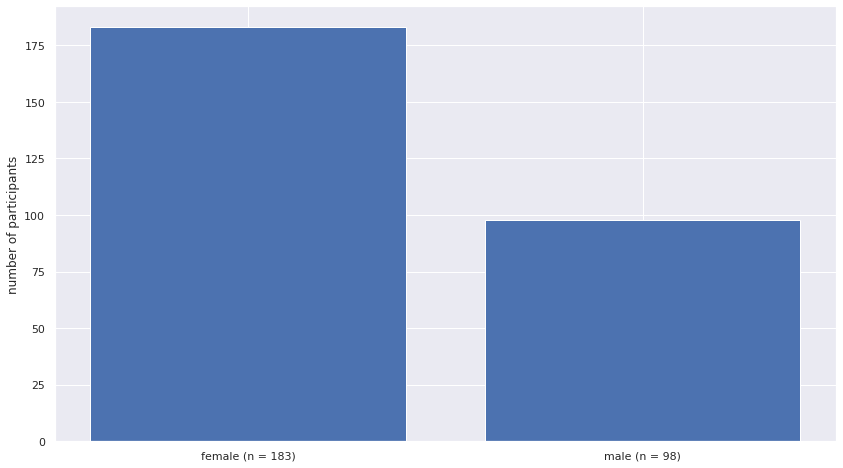

In [20]:
plt.bar(["female (n = 183)","male (n = 98)"],[sum(sex[:,0]),sum(sex[:,1])])
plt.ylabel('number of participants')
plt.plot ()

Quite a few more female participants than male participants in our sample!

Next, we will import the BOLD-data we are using in this tutorial. 

The first line imports the data of previously mentioned 281 participants, stored in a numpy file container. Thankfully, it is preprocessed, so we don't have to deal with that in this tutorial.

In [7]:
bold = np.load ('bold.npy')
bold.shape

(281, 113, 884)

In the line above the shape of the data is printed. The bold data is organized as `(participant, node, time)`. Let's visualize part the activity for 10 nodes for the first participants.

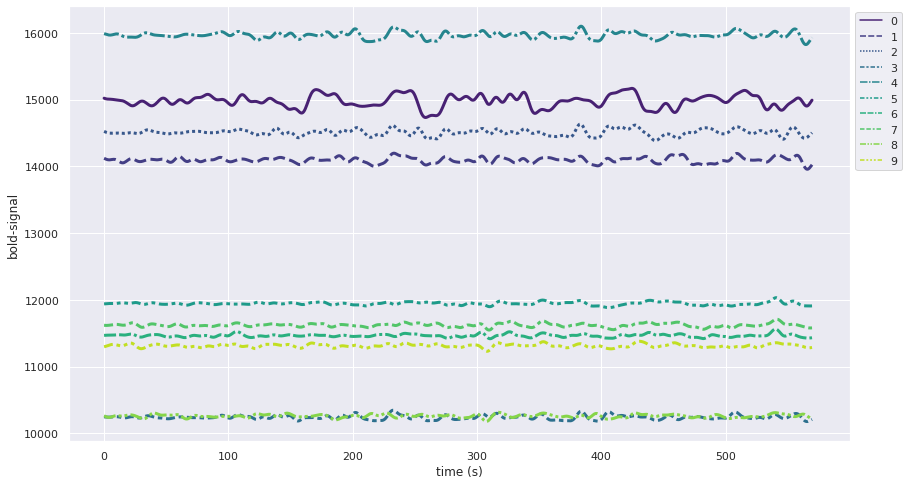

In [8]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14, 8)})
plotdata=pd.DataFrame(np.transpose(bold, (0, 2, 1))[0, :, :10])
ax = sns.lineplot(data=plotdata,
                  palette='viridis',
                  legend='auto', lw=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('bold-signal')
plt.xlabel('time (s)')
plt.xticks(np.arange(0, 1000, 155.03875),labels = np.arange(0, 600, 100))
plt.show()

## **Preparing the BOLD-data**

Hmm, we can't pass this data directly to a neural network. Not only is the bold extremely high (which we could fix through a normalizer), but also is the variation of the activation low. One metric that is often used in neuroscience is the correlation matrix, describing the functional connectivity of ROIs. If we'd only compute the cross-correlation for the whole time series, we'd neglect the temporal component, though.

What we do is compute the functional connectivity multiple times using sliding window correlations over $ti$ time-intervals, for which then obtain $ti$ correlation matrices. This is a widely used practice in computational neuroscience. The resulting matrices may reflect the changing functional connectivity over time

In [9]:
ti=44 #The amount of sliding windows

longwin = np.zeros((281, ti, 6328))
for n in range(len(bold[:, 0, 0])):
    for t in range(ti):
        longwin[n, t, :] = np.corrcoef(bold[n, :, 20 * (t):20 * (t+1)])[np.triu_indices(113, k=1)]

Wait, what just happened? Here we chose an arbitrary number ti of time intervals (I opted for $884 / 44 ≈ 20$). Through np.corrcoef we calculate the cross-correlation 88 times for 10 timesteps each. Since the cross-correlation matrix is symmetrical, we extract and flatten one half of it with `np.triu_indices(113, k=1)` (the area in the red triangle in the illustration below, which is equal to 6328 datapoints). This is repeated for each participant.

Text(0.5, 0, 'node')

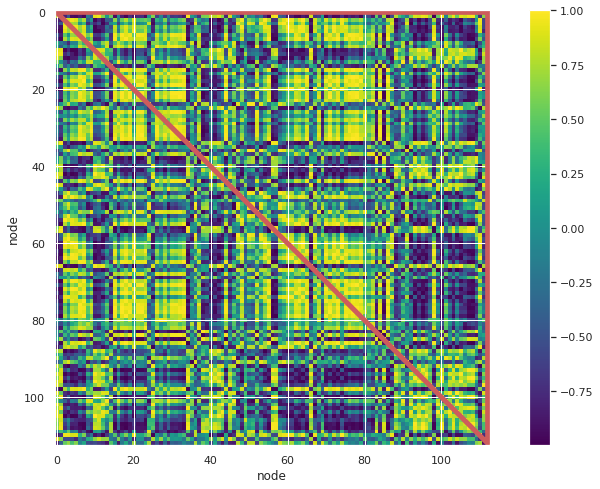

In [10]:
sns.set(rc={'figure.figsize':(14,8)})
plt.imshow(np.corrcoef(bold[1, :, 0:20 ]), cmap='viridis') #plots a correlation matrix
plt.colorbar()
plt.plot([0, 112, 112, 0],[0, 0, 112, 0], color='indianred', linewidth=5) # plots the triangle
plt.ylabel('node')
plt.xlabel('node')

Finally, for each participant the flattened data is stored in yet another array we called *longwin* with the dimensions: *(number of participants **281** x number of dynamic functional connectivity **44** x flattened correlations **6328**)*. Below, 200 of these correlation points are plotted for one participant.

Note that one line equals the flattened triangle from above.

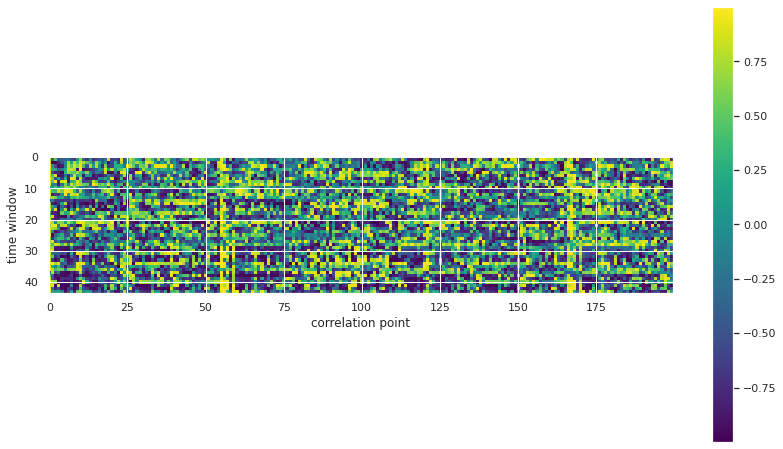

In [11]:
sns.set(rc={'figure.figsize':(14, 8)})
plt.imshow(longwin[1, :, :200], cmap='viridis', interpolation='nearest') #plots the dynamic functional connectivity matrix
plt.colorbar()
plt.ylabel('time window')
plt.xlabel('correlation point')
plt.show()

## **Training, Validation & Testing Sets**

Since this is about Neural Networks, we have to split the data into train, validation, and test sections. We, thus, split the time series into 70% train, 20% validation, and 10% test data. Really, the ratio between is somewhat arbitrary. If you experiment with NNs, just make sure you have enough samples for each "category" and attribute most of your data to the "train" data.

Never let your neural network see data you want to validate your network on before the validation! If you have never heard about why we split our data for training NNs, read [here](https://blog.roboflow.com/train-test-split/). The gist is: that if you only have one dataset (only train), you run into the risk of overfitting your model since your network learns well how to predict the training data. Still, you have no idea whether it is also capable of working with data it has never seen.

In [12]:
tenpercent=round(len(longwin)/10)
train_x, validation_x, test_x = longwin[tenpercent * 3:], longwin[tenpercent * 2: tenpercent * 3], longwin[0: tenpercent * 2]
train_y, validation_y, test_y = sex[tenpercent * 3:], sex[tenpercent * 2: tenpercent *3], sex[0: tenpercent * 2]

In [13]:
print(len(train_x), len(validation_x), len(test_x))

197 28 56


## **Building a Recurrent Neural Network**

Finally, we get to building our Neural Network.

We start by telling Keras that we aim to build a Sequential model, thus a model that for each layer has one input and one output tensor.

> **Reminder: What are Tensors?** A tensor is just an array with n-dimensions.

The next layer is our input layer. Here we define in which exact shape the network is getting data. In our case this must be the dimensions of the dynamic functional connectivity data stored in the longwin array, thus, it should be equal to 44 x 6328.

> **Note: Why not 281 x 44 x 6238?** That's because the data of all participants are sent into the network individually.

Finally, we arrive at the first RNN layer. I opted for an LSTM layer with 100 units, however, many variations of RNNs could be fair game. The amount of units is a hyperparameter that needs to be adjusted individually for each model and use case, sadly, there is no one-size-fits-all approach. Note the `return_sequences=True`? Through that statement, not only one value is passed along after a unit has seen all the data, but data is passed along after every data point. Remember the illustration regarding the input-output relations from the beginning? `return_sequences=True` makes the unit a many-to-many-unit, `return_sequences=False` would be a many-to-one. 

Next, I added a Dropout-layer. This removes some amount (in this case 40%) of the neurons for training. This is done in the hope of a more robust model with reduced risk for overfitting. (You will shortly see, whether that actually worked out :D)

After another LSTM layer, two dense (with all other neurons of the last layer connected) units are added, which represent the two hot encoded sex states and act as our outputs.

In [14]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer=Adam (lr=0.001), loss='binary_crossentropy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 44, 100)           2571600   
                                                                 
 dropout (Dropout)           (None, 44, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                4440      
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
Total params: 2,576,062
Trainable params: 2,576,062
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## **Training a Recurrent Neural Network**

Those 2.576.062 parameters need to be trained of course! We will add two additional arguments: `lr_decay` reduce the learning rate once the learning reaches a plateau and `early_stop` looks at the loss of the validation set and stops learning once validation loss increases. 

Finally, we train the model with the `model.fit()` function. 

In [15]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
lr_decay = ReduceLROnPlateau(monitor='val_loss', 
                             patience=5, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, 
                           patience=5, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
History=model.fit(train_x,train_y, #data that the model should train on
                  epochs=10, #defines the times the data is passed through the neural network
                  batch_size=10, #defines smaller batches of data that can passed through individually (10 parts per epoch)
                  validation_data=[validation_x,validation_y], #data not used for training, but for evaluating overfitting
                  shuffle=True, #if true, shuffles training data
                  verbose=1, #defines how much information is printed
                  callbacks=[lr_decay, early_stop]) #reduces learning rate/ stops learning for bad validation loss
                    


Epoch 1/10
20/20 [==============================] - 9s 59ms/step - loss: 0.6187 - val_loss: 0.7576 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 0.5412 - val_loss: 0.7459 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - 0s 17ms/step - loss: 0.4337 - val_loss: 0.8445 - lr: 0.0010
Epoch 4/10
20/20 [==============================] - 0s 17ms/step - loss: 0.3349 - val_loss: 0.7376 - lr: 0.0010
Epoch 5/10
20/20 [==============================] - 0s 18ms/step - loss: 0.2506 - val_loss: 0.8387 - lr: 0.0010
Epoch 5: early stopping


We see multiple interesting  things: of course, the training loss reduces over time, however, the validation loss is dramatically higher than the training loss, which is why the learning rate decreases over time as defined above.
This is a clear indication of overfitting. One way that might remedy that would be to gather more data. However, high-quality data is not too easily obtained. Another pitfall is the skewed distribution of sex in our sample. There are possibilites of data augmentation, however, these will not be discussed in this tutorial.

Until then, let's work with what we got!

## **Evaluating our Recurrent Neural Network**

As the next step, we predict the sex of the participants in our test dataset based on the weights and biases of the model we just trained with the `model.predict()` function.

In [16]:
y_hat = model.predict(test_x, batch_size=10, verbose=1)

6/6 [==============================] - 1s 8ms/step


Notice how we pass the features into the model. It is important - and I can't reiterate that often enough - that the model should have never seen the test data before, so that the prediction can actually tests whether a model can generalize to new data and is not only fitted to the training data.

Let's look at the first 10 predictions and the actual labels of the data. Below we print the percentage of how likely the model thinks a person is female or male respectively. On the right hand the actual sex of the subject is printed.

In [17]:
for i in range(10):
  print(y_hat[i],np.array(test_y)[i,:])

[0.79438186 0.13905282] [1. 0.]
[0.35311505 0.7648932 ] [0. 1.]
[0.64569324 0.26176444] [0. 1.]
[0.7325904  0.24075475] [1. 0.]
[0.59041685 0.55491155] [0. 1.]
[0.32730067 0.83840674] [0. 1.]
[0.3253182 0.6073411] [1. 0.]
[0.79051256 0.12758003] [1. 0.]
[0.62335145 0.43531993] [0. 1.]
[0.7677566  0.20556735] [1. 0.]


That really only kind of helps to evaluate, whether our model was successful. For a better evaluation, let's compare a **baseline guess** (aka, if a model would only e.g. "female" for all subjects) versus **our model**. 

A guess is defined by the values outputted by the first *Dense Neuron*. If the value is **higher than 0.5** we interpret the prediction as "female". (e.g. first node of the first participant outputs a value of `~0.79 > 0.5`, thus, we interpret the value as a guess for "female" sex.

In [18]:
print(f"Baseline is: {np.sum(test_y[:,0])/len(test_y)}")
acc=0
for i in y_hat[:,0]:
  if i>0.5:
    acc+=1
print(f"Performance of model is: {acc/len(y_hat)}")


Baseline is: 0.5892857142857143
Performance of model is: 0.7678571428571429


Would you look at that, it beat the baseline by more than 17%! I call that a success! 

I hope this section helped to give you a glimpse at how a RNN implementation could look like in Keras for Neuroscience. Of course, we chose a fairly simple model and there are endless possibilites when it comes to using any sort of neural network unit.

# **Self-Test Questions & Closing Words** #

Before we close this session, feel free reading through the following questions and answers. 

```{admonition} Why do RNNs have the possibilities to better predict values of timeseries?
:class: dropdown
Through the architecture of RNNs, the  Neural networks can carry information from one timesteps to subsequent ones. Through that the temporal information can be utilized. Conventional neural networks don't have such capabilites.
```

```{admonition} What are the different gates of LSTMs?
:class: dropdown
In LSTMs, there are three different gates: The input-, forget-, and output-gate: The input gate handles new information and which part of it, might be important. The forget gate updates the cell-state, while the output gate can output data (hence the name hehe).
```

```{admonition} General Question: Why do we split data into training, testing and validation?
:class: dropdown
" if you only have one dataset (only train), you run into the risk of overfitting your model since your network learns well how to predict the training data. Still, you have no idea whether it is also capable of working with data it has never seen."
```

I hope I managed to show you the great possibilities of RNNs! This tutorial was only the most basic introduction to what RNNs offer. RNNs can handle multiple inputs and deliver outputs in various forms and shapes, indicated by the number of use cases mentioned in this tutorial.

Thanks for reading this tutorial, hopefully, it wasn't dull, and you have learned some new things. Take care, and keep up the great work! :)
